<a href="https://colab.research.google.com/github/anjalinagel12/Deep-Learning-Projects-using-fast.ai/blob/master/Intel_Scene_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Need v1.0.25 of fastai which is not yet published so install it from GitHub.

In [2]:
# To determine which version you're using:
!pip show tensorflow

# For the current version: 
!pip install --upgrade tensorflow

# For a specific version:
#!pip install tensorflow==1.2

# For the latest nightly build:
#!pip install tf-nightly


Name: tensorflow
Version: 1.13.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: opensource@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: numpy, termcolor, gast, six, protobuf, tensorflow-estimator, absl-py, wheel, keras-preprocessing, grpcio, astor, keras-applications, tensorboard
Required-by: stable-baselines, magenta, fancyimpute
Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (1.13.1)


In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

In [4]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html

Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
    100% |████████████████████████████████| 576.2MB 27kB/s 


In [5]:
import torch
print(torch.__version__)
!pip install torchtext==0.2.3
!pip install Pillow==4.0.0
!pip install PIL
!pip install image

1.0.0.dev20181206
    100% |████████████████████████████████| 51kB 1.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/42/a6/f4/b267328bde6bb680094a0c173e8e5627ccc99543abded97204
Successfully built torchtext
  Found existing installation: torchtext 0.3.1
    Uninstalling torchtext-0.3.1:
      Successfully uninstalled torchtext-0.3.1
    100% |████████████████████████████████| 5.6MB 6.1MB/s 
torchvision 0.2.2.post3 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
imgaug 0.2.8 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
fastai 1.0.46 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: Pillow 4.1.1
    Uninstalling Pillow-4.1.1:
      Successfully uninstalled Pillow-4.1.1


  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL


In [6]:
!pip install fastai==1.0.26

    100% |████████████████████████████████| 122kB 3.6MB/s 
    100% |████████████████████████████████| 1.9MB 13.0MB/s 
    100% |████████████████████████████████| 61kB 24.4MB/s 
    100% |████████████████████████████████| 23.3MB 1.8MB/s 
spacy 2.0.16 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
torchvision-nightly 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
  Found existing installation: thinc 6.12.1
    Uninstalling thinc-6.12.1:
      Successfully uninstalled thinc-6.12.1
  Found existing installation: spacy 2.0.18
    Uninstalling spacy-2.0.18:
      Successfully uninstalled spacy-2.0.18
  Found existing installation: fastai 1.0.46
    Uninstalling fastai-1.0.46:
      Successfully uninstalled fastai-1.0.46


In [0]:
from fastai import *
from fastai.vision import *
import pandas as pd 

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Kernel->Restart, uncomment the 2nd line below to use a smaller batch size (you'll learn all about what this means during the course), and try again.



In [0]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

##Intel-Scene-Image-Classification

###Looking at the data

###Getting Dataset from Kaggle

In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
!echo '{"username":"anjalichoudhary12","key":"b0b6aa42222cfb127150aea85c0c2e90"}'> ~/.kaggle/kaggle.json  # Replace
!chmod 600 kaggle.json


In [15]:
!kaggle datasets download -d puneet6060/intel-image-classification

 98% 337M/344M [00:07<00:00, 54.4MB/s]
100% 344M/344M [00:07<00:00, 48.0MB/s]


In [0]:
!mkdir -p data


In [17]:
!unzip intel-image-classification.zip -d data


Archive:  intel-image-classification.zip
  inflating: data/seg_train.zip      
  inflating: data/seg_test.zip       
  inflating: data/seg_pred.zip       


In [51]:
print("all files unzipped. Images in train folder and labels in test.csv")


all files unzipped. Images in train folder and labels in test.csv


In [18]:
ls

data/  intel-image-classification.zip  kaggle.json  sample_data/


In [19]:
cd data


/content/data


In [20]:
ls

seg_pred.zip  seg_test.zip  seg_train.zip


In [0]:
!mkdir pred

In [0]:
!unzip seg_pred.zip

In [0]:
mv seg_pred pred

In [35]:
cd ..


/content


In [36]:
ls

data/  intel-image-classification.zip  kaggle.json  sample_data/


In [37]:
path = 'data/train';path

'data/train'

In [41]:
print(data.test_ds[0])

(Image (3, 150, 150), Category street)


In [42]:
print(data.classes)
len(data.classes),data.c


['street', 'buildings', 'sea', 'forest', 'glacier', 'mountain']


(6, 6)

In [43]:
test_fnames = get_image_files('data/test')
test_fnames[:5]

[]

In [44]:
len(test_fnames)


0

In [47]:
ls

data/  intel-image-classification.zip  kaggle.json  sample_data/


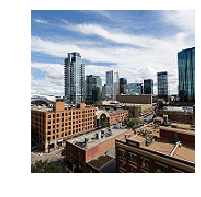

In [53]:
img = open_image('data/train/seg_train/buildings/10006.jpg')
img.show()

In [0]:

tfms = get_transforms()
data = ImageDataBunch.from_folder(path, train='train', valid_pct=0.2, test='../test', ds_tfms=tfms)

In [0]:
tfms = get_transforms(do_flip=True)
data = (ImageItemList.from_folder(path)
        .random_split_by_pct()
        .label_from_folder()
        .transform(tfms, size=224)
        .databunch())


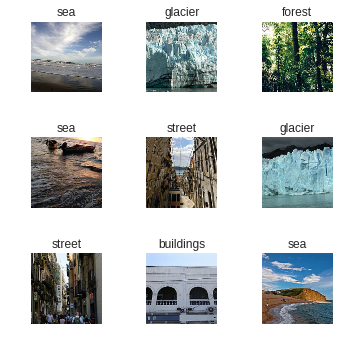

In [56]:
data.show_batch(rows=3, figsize=(5,5))


In [57]:
print(data.classes)
len(data.classes),data.c

['street', 'buildings', 'sea', 'forest', 'glacier', 'mountain']


(6, 6)

##Training: resnet34

In [0]:
#For Metrics to have Top 3 results
from fastai import *
from sklearn import metrics as skm

In [59]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 98818783.38it/s] 


In [60]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


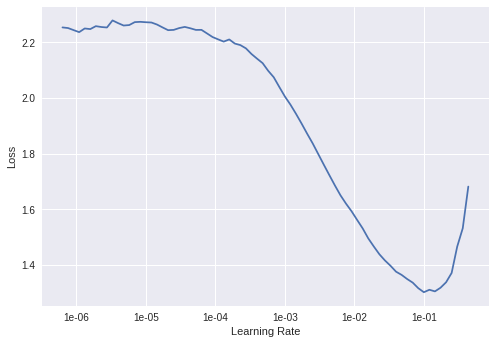

In [61]:
learn.recorder.plot()


In [62]:
learn.fit_one_cycle(6) ## best way to fit as of 2018
print("learning complete")

e,p,o,c,h,,,t,r,a,i,n,_,l,o,s,s,,,v,a,l,i,d,_,l,o,s,s,,,a,c,c,u,r,a,c,y
1,,,,,,,0,.,4,1,8,7,7,5,,,,,0,.,2,4,5,0,1,6,,,,,0,.,9,1,0,9,0,5
2,,,,,,,0,.,2,9,4,3,5,6,,,,,0,.,2,2,9,3,1,1,,,,,0,.,9,1,3,4,0,0
3,,,,,,,0,.,2,5,4,8,0,1,,,,,0,.,1,9,3,4,3,8,,,,,0,.,9,3,1,5,7,5
4,,,,,,,0,.,2,1,5,1,1,8,,,,,0,.,1,7,9,0,1,2,,,,,0,.,9,3,7,9,9,0
5,,,,,,,0,.,1,8,6,2,8,5,,,,,0,.,1,8,0,7,0,2,,,,,0,.,9,3,7,2,7,7
6,,,,,,,0,.,1,5,5,3,5,9,,,,,0,.,1,6,9,7,8,8,,,,,0,.,9,4,1,9,1,0


learning complete


In [63]:
print("we save after 1st weights are learned")
learn.save('stage-1-34')

we save after 1st weights are learned


In [64]:
learn.unfreeze()
learn.fit_one_cycle(6, max_lr=slice(1e-5,1e-3))


e,p,o,c,h,,,t,r,a,i,n,_,l,o,s,s,,,v,a,l,i,d,_,l,o,s,s,,,a,c,c,u,r,a,c,y
1,,,,,,,0,.,1,9,5,1,7,7,,,,,0,.,1,7,8,0,0,8,,,,,0,.,9,4,2,6,2,3
2,,,,,,,0,.,1,8,2,1,4,4,,,,,0,.,2,1,2,6,7,0,,,,,0,.,9,3,9,0,5,9
3,,,,,,,0,.,1,6,5,3,8,7,,,,,0,.,1,8,0,6,6,0,,,,,0,.,9,3,9,0,5,9
4,,,,,,,0,.,1,0,7,2,2,2,,,,,0,.,1,9,0,6,1,9,,,,,0,.,9,3,7,2,7,7
5,,,,,,,0,.,0,6,3,3,9,5,,,,,0,.,1,7,6,1,5,0,,,,,0,.,9,4,4,0,4,8
6,,,,,,,0,.,0,4,1,5,0,8,,,,,0,.,1,8,0,2,1,6,,,,,0,.,9,4,5,1,1,8


In [65]:
learn.save('stage-2-34')
print("we save after 2nd weights are learned")

we save after 2nd weights are learned


In [66]:
#!mv chromestage-2-50.pth data/train/models/chromestage-2-50.pth
print("weights loaded")

weights loaded


In [0]:
learn.load('stage-2-34');


In [0]:
interp = ClassificationInterpretation.from_learner(learn)


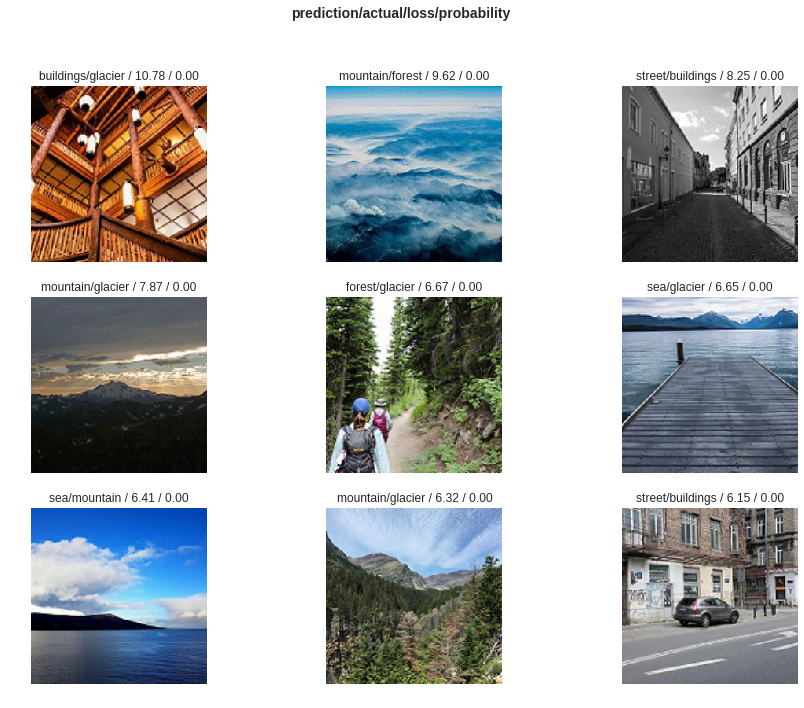

In [69]:
interp.plot_top_losses(9, figsize=(15,11)) # Prediction/ Actual/ Loss/ Probability


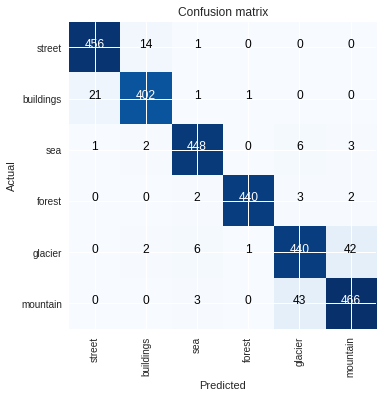

In [70]:
interp.plot_confusion_matrix()
